<a href="https://colab.research.google.com/github/bhavyasriambati/Projects/blob/main/h1n1_vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [3]:
###Reading CSV file
df = pd.read_csv("/content/h1n1_vaccine_prediction (2).csv")

In [4]:
df.sample(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
12489,12489,3.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,4.0,4.0,2.0,2.0,35 - 44 Years,12 Years,White,Female,"> $75,000",Married,Own,Employed,Non-MSA,1.0,1.0,0
3643,3643,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,5.0,4.0,2.0,4.0,65+ Years,12 Years,White,Female,NaN,Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
22161,22161,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,4.0,65+ Years,Some College,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
19127,19127,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,2.0,1.0,2.0,1.0,1.0,55 - 64 Years,12 Years,White,Female,NaN,Married,Own,Employed,Non-MSA,1.0,0.0,0
11392,11392,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,4.0,45 - 54 Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",1.0,0.0,0


In [5]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [6]:
df.shape

(26707, 34)

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_id,26707.0,NaN,NaN,NaN,13353.0,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_worry,26615.0,NaN,NaN,NaN,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_awareness,26591.0,NaN,NaN,NaN,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
antiviral_medication,26636.0,NaN,NaN,NaN,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
contact_avoidance,26499.0,NaN,NaN,NaN,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
bought_face_mask,26688.0,NaN,NaN,NaN,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
wash_hands_frequently,26665.0,NaN,NaN,NaN,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
avoid_large_gatherings,26620.0,NaN,NaN,NaN,0.35864,0.47961,0.0,0.0,0.0,1.0,1.0
reduced_outside_home_cont,26625.0,NaN,NaN,NaN,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
avoid_touch_face,26579.0,NaN,NaN,NaN,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [9]:
duplicate = df[df.duplicated()]
duplicate

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine


**Dealing with missing values**

In [10]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [11]:
df.drop('has_health_insur',axis=1,inplace=True)

**Iterative method to fill null values**

In [12]:
median = 0
for column in df.columns:
  if df[column].isnull().sum() != 0 and df[column].dtype in [np.float64, np.int64]:
    median = df[column].median()
    df[column].fillna(median, inplace=True)

In [13]:
mode = 0
for column in df.columns:
  if df[column].isnull().sum() != 0 and df[column].dtype not in [np.float64, np.int64]:
    mode = df[column].mode().values[0]
    df[column].fillna(mode, inplace=True)

In [14]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [15]:
df.shape

(26707, 33)

In [16]:
df.drop('unique_id',axis=1,inplace=True)

**there is also dropna() method but i preferred imputing method for better and larger data**


**Dealing with outliers**

In [17]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

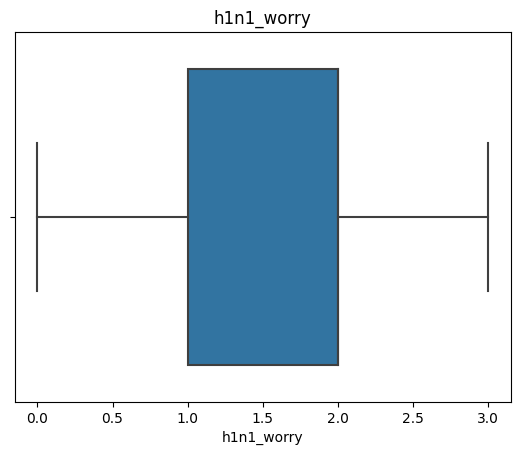

<Figure size 1000x600 with 0 Axes>

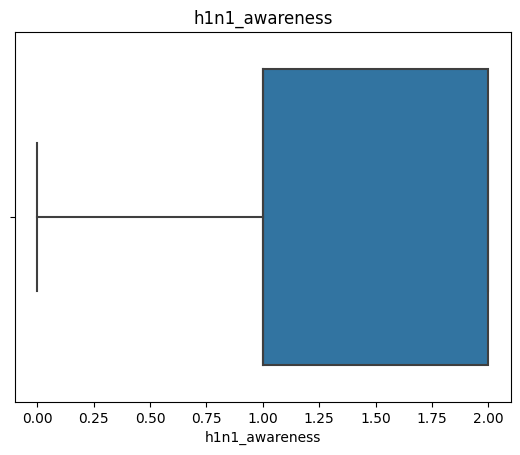

<Figure size 1000x600 with 0 Axes>

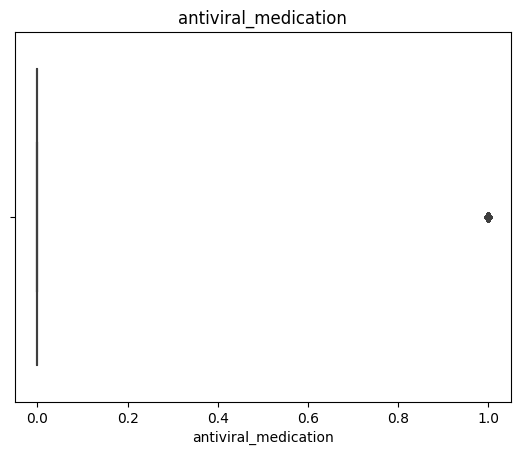

<Figure size 1000x600 with 0 Axes>

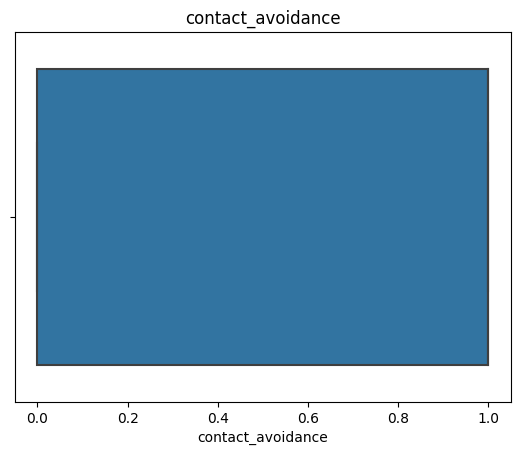

<Figure size 1000x600 with 0 Axes>

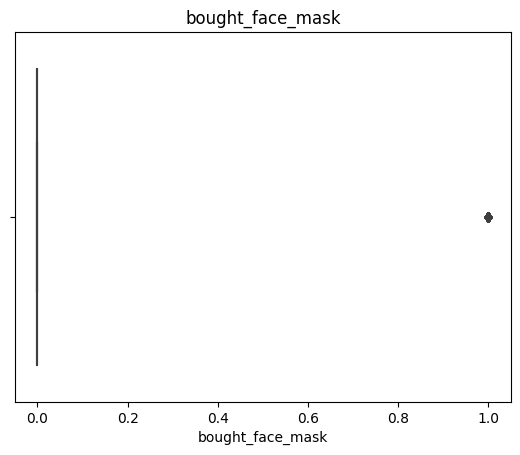

<Figure size 1000x600 with 0 Axes>

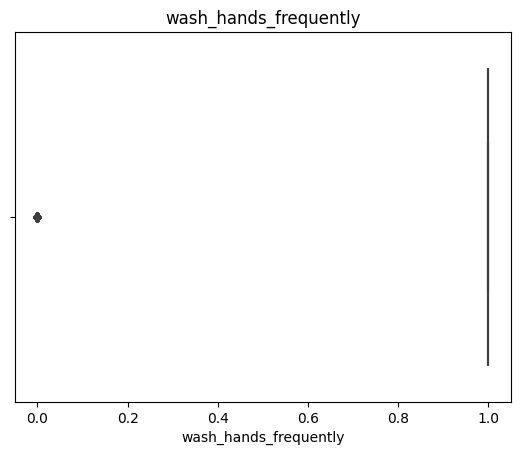

<Figure size 1000x600 with 0 Axes>

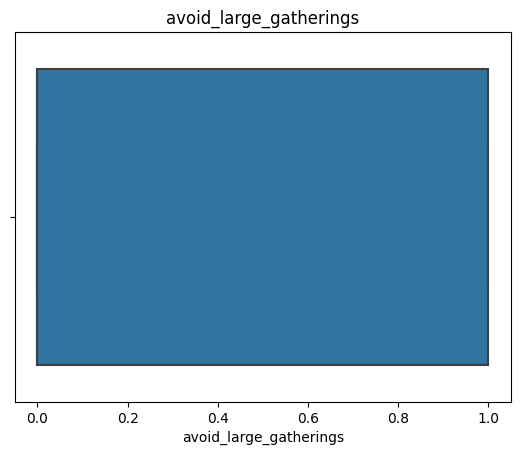

<Figure size 1000x600 with 0 Axes>

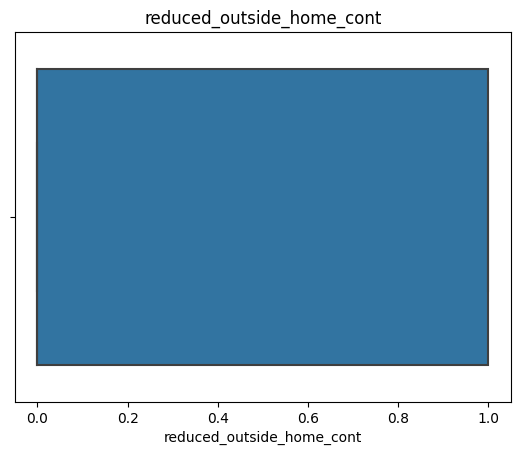

<Figure size 1000x600 with 0 Axes>

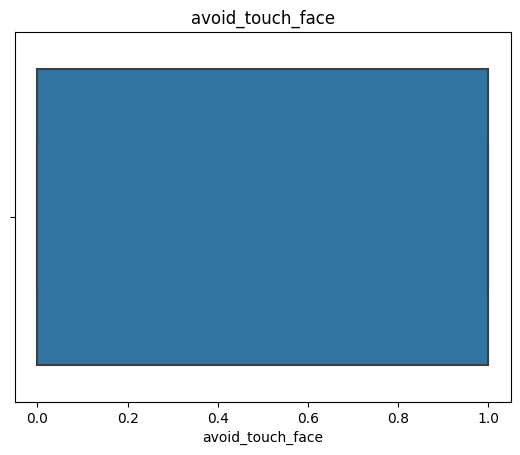

<Figure size 1000x600 with 0 Axes>

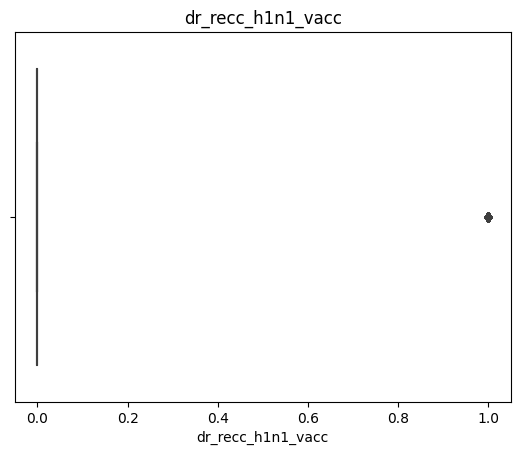

<Figure size 1000x600 with 0 Axes>

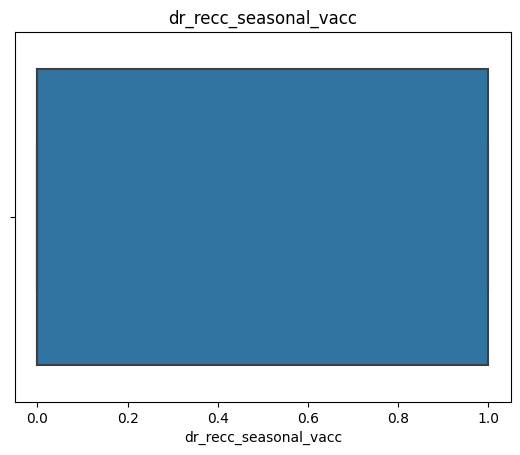

<Figure size 1000x600 with 0 Axes>

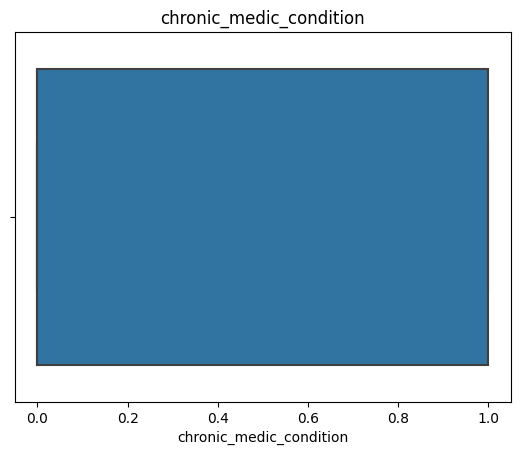

<Figure size 1000x600 with 0 Axes>

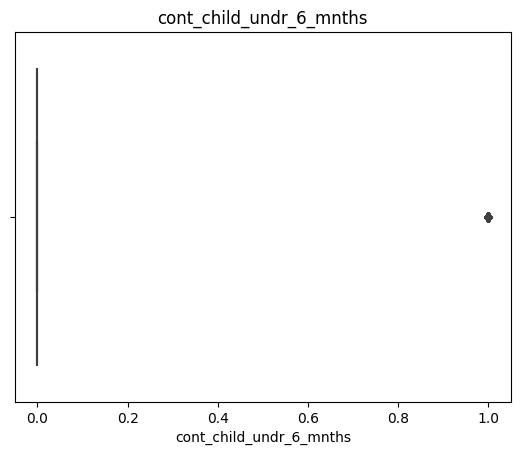

<Figure size 1000x600 with 0 Axes>

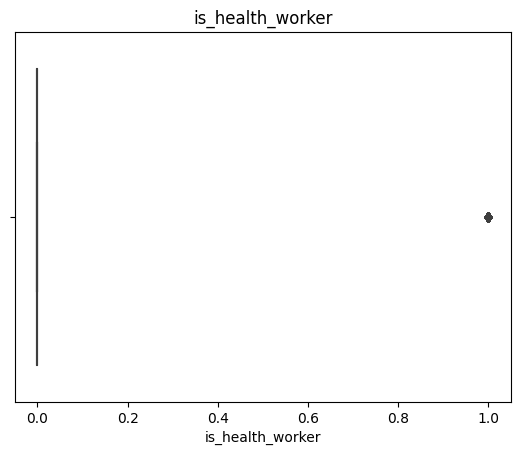

<Figure size 1000x600 with 0 Axes>

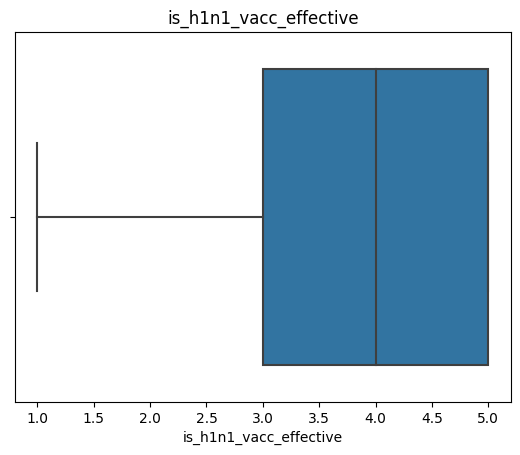

<Figure size 1000x600 with 0 Axes>

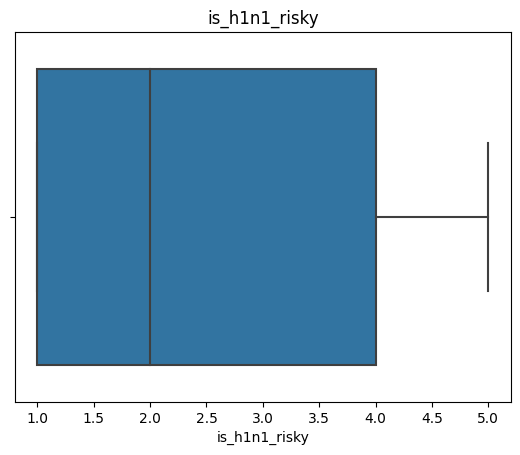

<Figure size 1000x600 with 0 Axes>

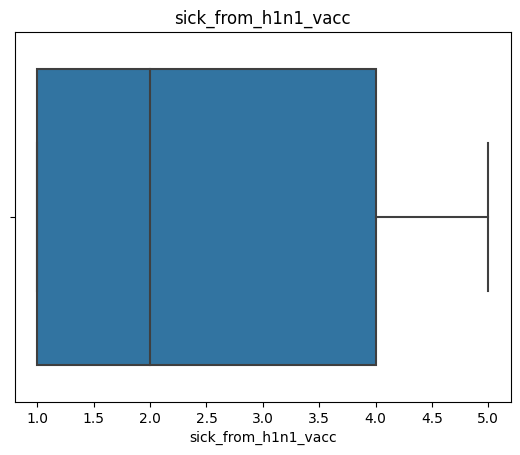

<Figure size 1000x600 with 0 Axes>

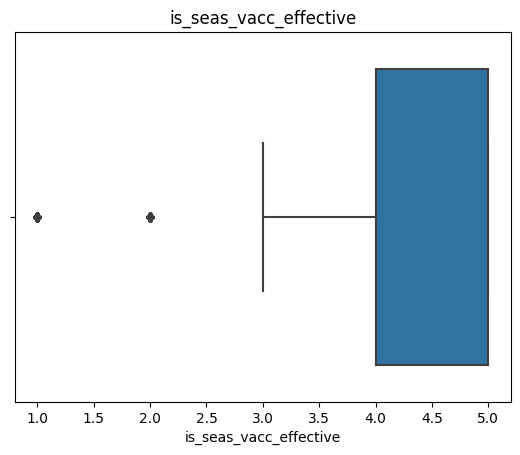

<Figure size 1000x600 with 0 Axes>

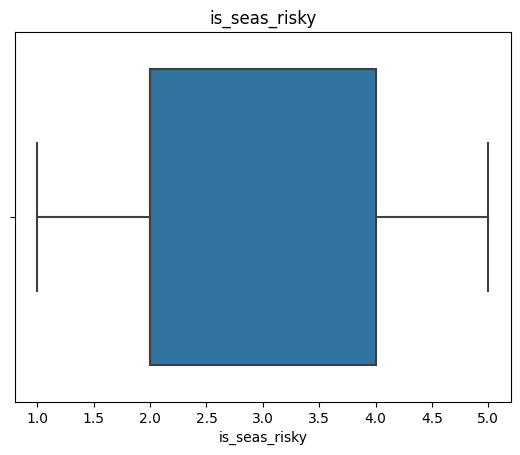

<Figure size 1000x600 with 0 Axes>

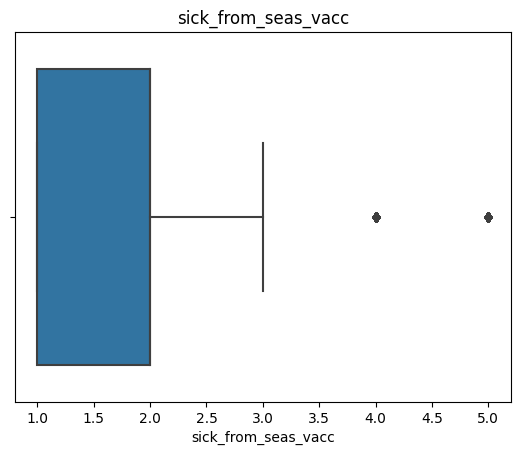

<Figure size 1000x600 with 0 Axes>

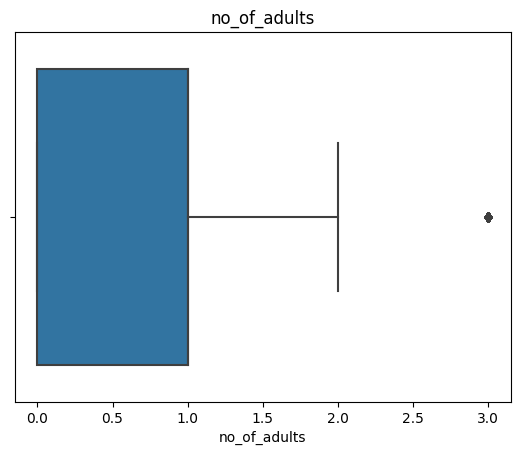

<Figure size 1000x600 with 0 Axes>

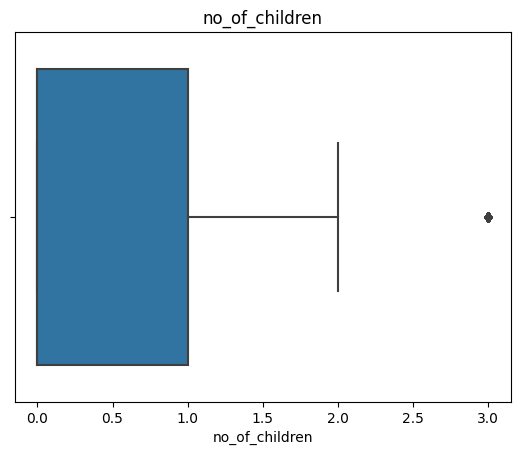

<Figure size 1000x600 with 0 Axes>

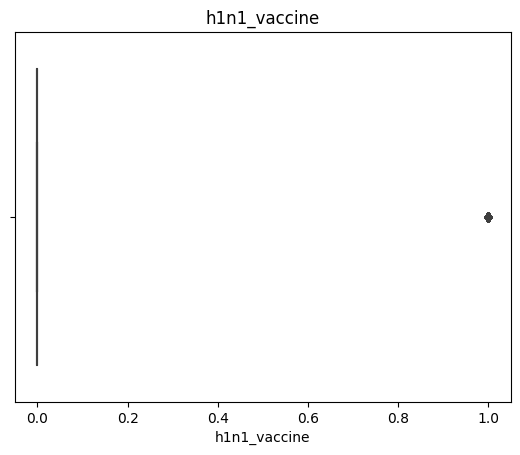

<Figure size 1000x600 with 0 Axes>

In [18]:
# Select the numerical columns for boxplot
numerical_columns = df.select_dtypes(include='number')

# Create boxplots for numerical columns
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.figure(figsize=(10, 6))
    plt.show()

In [19]:
columns = (['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'])
for column in columns:
  print(df[column].unique())

[1. 3. 2. 0.]
[0. 2. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[3. 5. 4. 2. 1.]
[1. 4. 3. 2. 5.]
[2. 4. 1. 5. 3.]
[2. 4. 5. 3. 1.]
[1. 2. 4. 3. 5.]
[2. 4. 1. 5. 3.]
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
['< 12 Years' '12 Years' 'College Graduate' 'Some College']
['White' 'Black' 'Other or Multiple' 'Hispanic']
['Female' 'Male']
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
['Not Married' 'Married']
['Own' 'Rent']
['Not in Labor Force' 'Employed' 'Unemployed']
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
[0. 2. 1. 3.]
[0. 3. 2. 1.]
[0 1]


In [20]:
df["income_level"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

* **There are no outliers**

**ENCODING**


(i) **manual encoding**, because these columns have inherent oredered data. 
(i) manual encoding, because these columns have inherent oredered data.



In [21]:
# Define the mapping dictionary for encoding
encoding_dict1 = {'18 - 34 Years': 0, '35 - 44 Years': 1, '45 - 54 Years': 2,'55 - 64 Years' : 3,'65+ Years':4}
encoding_dict3 = {'Below Poverty':0, '<= $75,000, Above Poverty':1, '> $75,000':2}

In [22]:
df['age_bracket'] = df['age_bracket'].map(encoding_dict1)
df['income_level'] = df['income_level'].map(encoding_dict3)

In [23]:
df["income_level"].unique()

array([0, 1, 2])

In [24]:
df["income_level"].unique()

array([0, 1, 2])

(ii) **Label Encoding**,already df2 has already more no. of columns.

In [25]:
df['sex'] = le().fit_transform(df['sex'])
df['race'] = le().fit_transform(df['race'])
df['marital_status'] = le().fit_transform(df['marital_status'])
df['employment'] = le().fit_transform(df['employment'])
df['housing_status'] = le().fit_transform(df['housing_status'])
df['census_msa'] = le().fit_transform(df['census_msa'])
df['qualification'] = le().fit_transform(df['qualification'])

In [26]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int64
qualification                  int64
race                           int64
sex                            int64
income_level                   int64
marital_status                 int64
housing_status                 int64
e

In [27]:
### checking for strength and direction of relation
corr_data=df.corr()

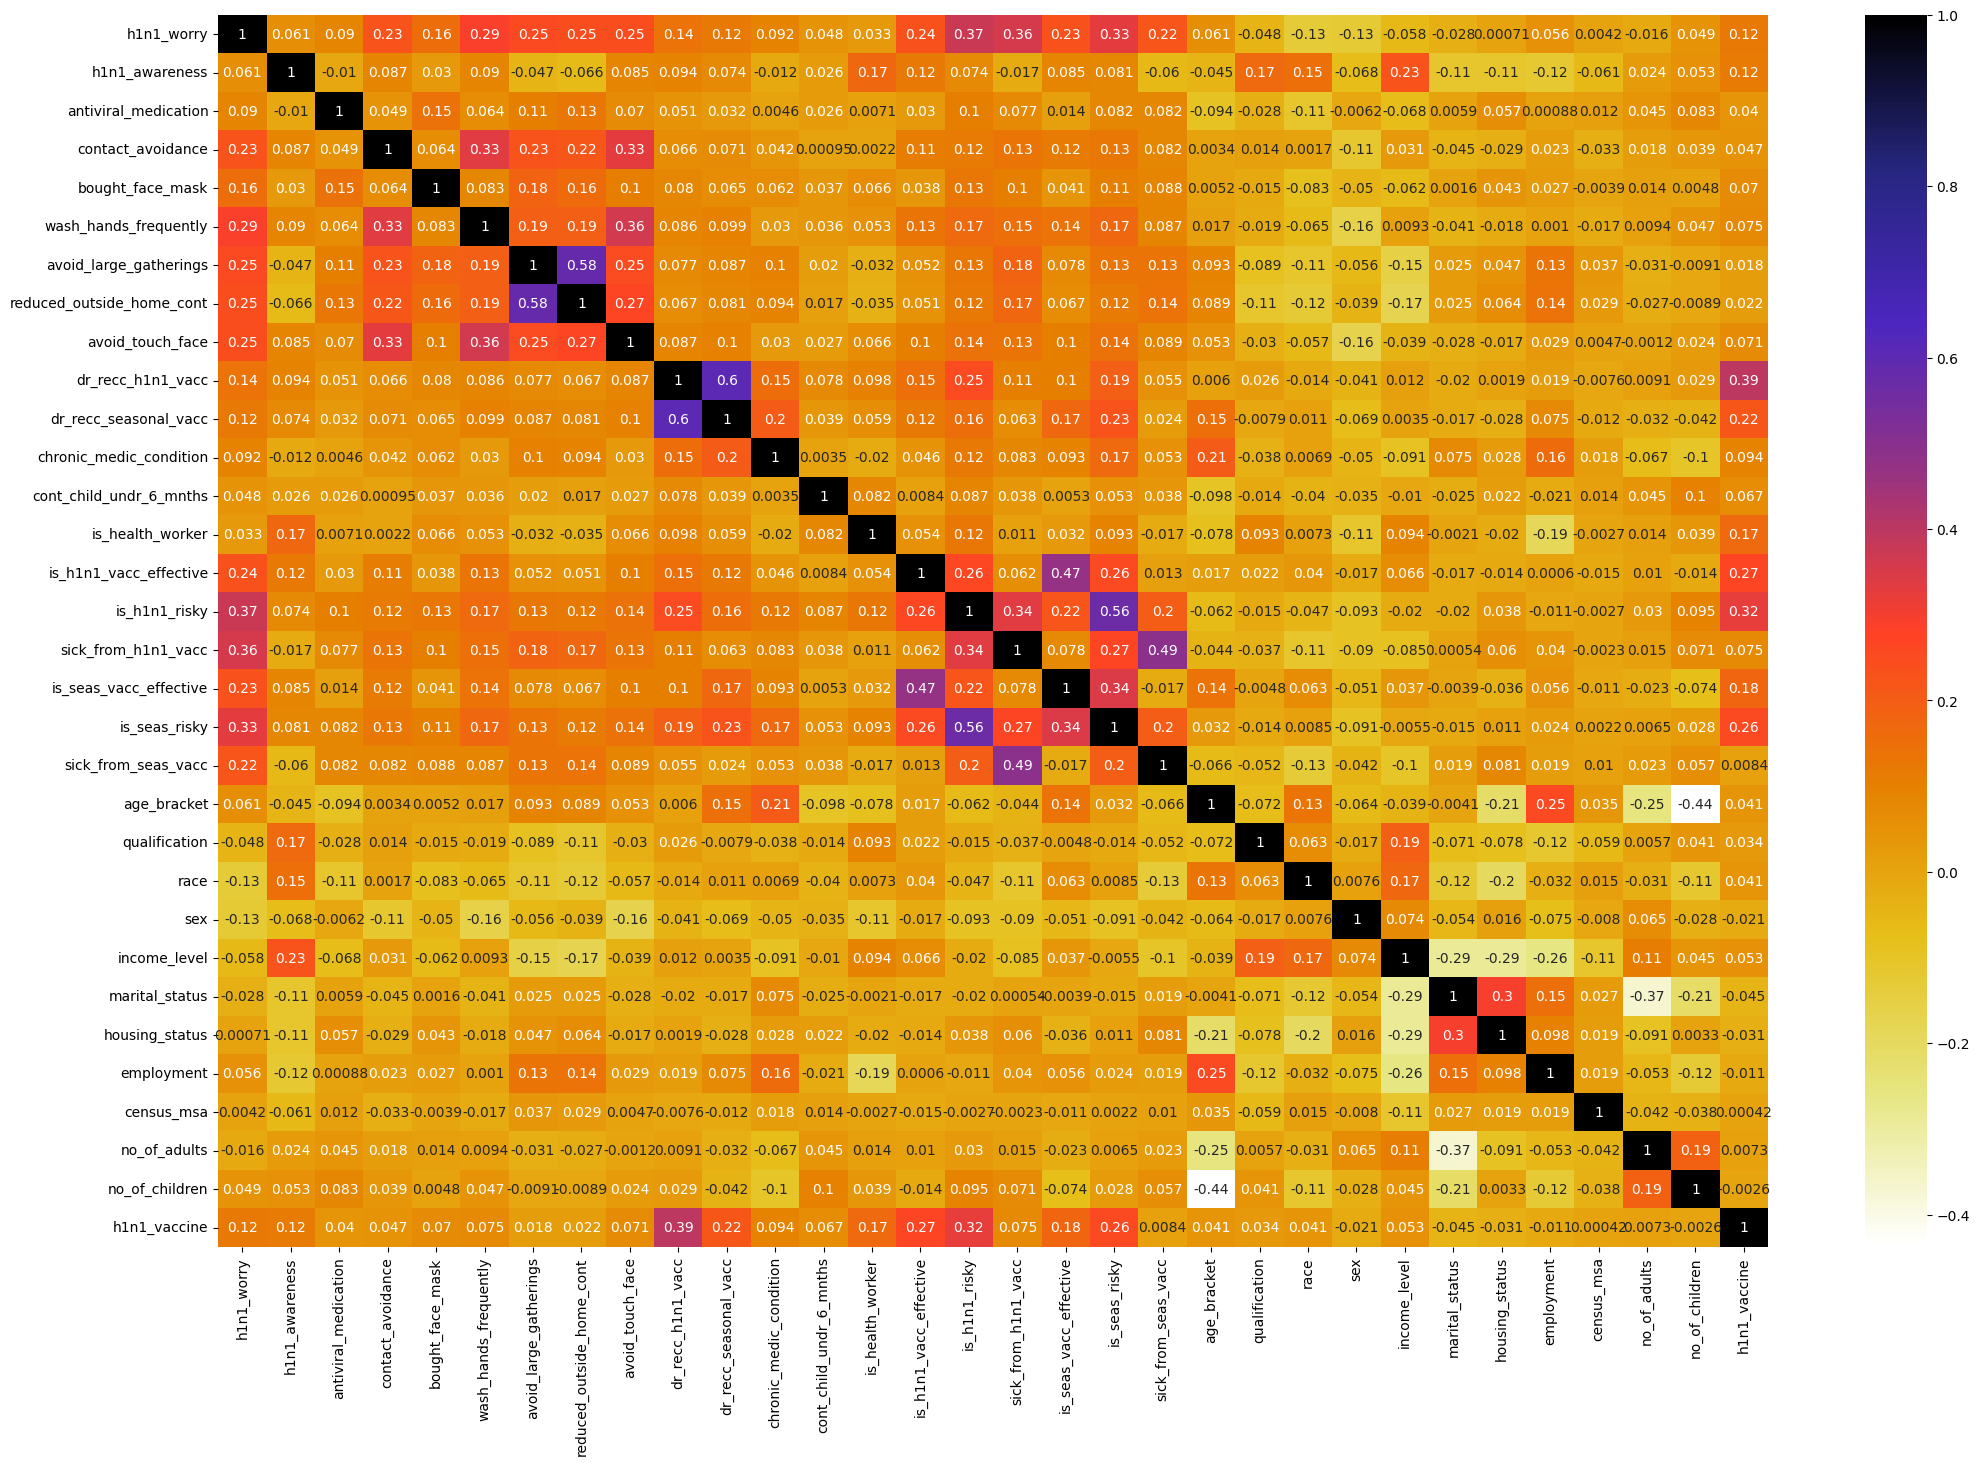

In [28]:
#visualizing
plt.figure(figsize=(25,16))
sns.heatmap(corr_data, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

**preparing for modelling**


In [29]:
### splitting input and output data
Y = df["h1n1_vaccine"]
X = df.drop(columns=["h1n1_vaccine"]) #dependent variable = h1n1_vaccine

In [30]:
###Splittin training data(80%) & testing data(20%)
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size = 0.2 , random_state = 1)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21365 entries, 22542 to 235
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 21365 non-null  float64
 1   h1n1_awareness             21365 non-null  float64
 2   antiviral_medication       21365 non-null  float64
 3   contact_avoidance          21365 non-null  float64
 4   bought_face_mask           21365 non-null  float64
 5   wash_hands_frequently      21365 non-null  float64
 6   avoid_large_gatherings     21365 non-null  float64
 7   reduced_outside_home_cont  21365 non-null  float64
 8   avoid_touch_face           21365 non-null  float64
 9   dr_recc_h1n1_vacc          21365 non-null  float64
 10  dr_recc_seasonal_vacc      21365 non-null  float64
 11  chronic_medic_condition    21365 non-null  float64
 12  cont_child_undr_6_mnths    21365 non-null  float64
 13  is_health_worker           21365 non-null  f

**Fitting with models**


In [ ]:
#Fitting with logistic regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

In [33]:
y_pred = lr.predict(X_test)
lr_acc = accuracy_score(Y_test, y_pred)
print(lr_acc)

0.8421939348558592


In [34]:
results = pd.DataFrame()
tempresults = pd.DataFrame({'Algorithm': ['logistic Regression Method'], 'Accuracy':[lr_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.842194


In [35]:
#Fitting with Bagging classifier
bc = DecisionTreeClassifier()
bc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [39]:
y_pred = bc.predict(X_test)
bc_acc = accuracy_score(Y_test, y_pred)
print(bc_acc)

0.7521527517783602


In [40]:

tempresults = pd.DataFrame({'Algorithm': ['Bagging Classifier Method'], 'Accuracy':[bc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.842194
0,Bagging Classifier Method,0.752153


In [41]:
#Fitting with logistic classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [42]:
y_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(Y_test, y_pred)
print(dtc_acc)

0.7555222763010109


In [43]:
tempresults = pd.DataFrame({'Algorithm': ['Decision Tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.842194
0,Bagging Classifier Method,0.752153
0,Decision Tree Classifier Method,0.755522


In [44]:
#Fitting with  classification
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [45]:
y_pred = rfc.predict(X_test)

In [46]:
rfc_acc = accuracy_score(Y_test, y_pred)
print(rfc_acc)

0.8405091725945338


In [47]:
tempresults = pd.DataFrame({'Algorithm': ['Random forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.842194
0,Bagging Classifier Method,0.752153
0,Decision Tree Classifier Method,0.755522
0,Random forest Classifier Method,0.840509


In [48]:
#Fitting with SVM classifier
svc = svm.SVC()
svc.fit(X_train, Y_train)

SVC()

In [49]:
y_pred = svc.predict(X_test)

In [50]:
svc_acc = accuracy_score(Y_test, y_pred)
print(svc_acc)

0.8384500187195807


In [51]:
tempresults = pd.DataFrame({'Algorithm': ['Support Vector Classifier Method'], 'Accuracy':[svc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.842194
0,Bagging Classifier Method,0.752153
0,Decision Tree Classifier Method,0.755522
0,Random forest Classifier Method,0.840509
0,Support Vector Classifier Method,0.838450


In [52]:
#Fitting with GradientBoosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)

GradientBoostingClassifier()

In [53]:
y_pred = gbc.predict(X_test)

In [54]:
gbc_acc = accuracy_score(Y_test, y_pred)
print(gbc_acc)

0.847997004867091


In [55]:
tempresults = pd.DataFrame({'Algorithm': ['Gradient Boosting Classifier Method'], 'Accuracy':[gbc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.842194
0,Bagging Classifier Method,0.752153
0,Decision Tree Classifier Method,0.755522
0,Random forest Classifier Method,0.840509
0,Support Vector Classifier Method,0.838450
0,Gradient Boosting Classifier Method,0.847997


In [57]:
#Fitting with AdaBoostingClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)

AdaBoostClassifier()

In [58]:
y_pred = abc.predict(X_test)

In [59]:
abc_acc = accuracy_score(Y_test, y_pred)
print(abc_acc)

0.8414451516286036


In [60]:
tempresults = pd.DataFrame({'Algorithm': ['Ada Boosting Classifier Method'], 'Accuracy':[abc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.842194
0,Bagging Classifier Method,0.752153
0,Decision Tree Classifier Method,0.755522
0,Random forest Classifier Method,0.840509
0,Support Vector Classifier Method,0.838450
0,Gradient Boosting Classifier Method,0.847997
0,Ada Boosting Classifier Method,0.841445


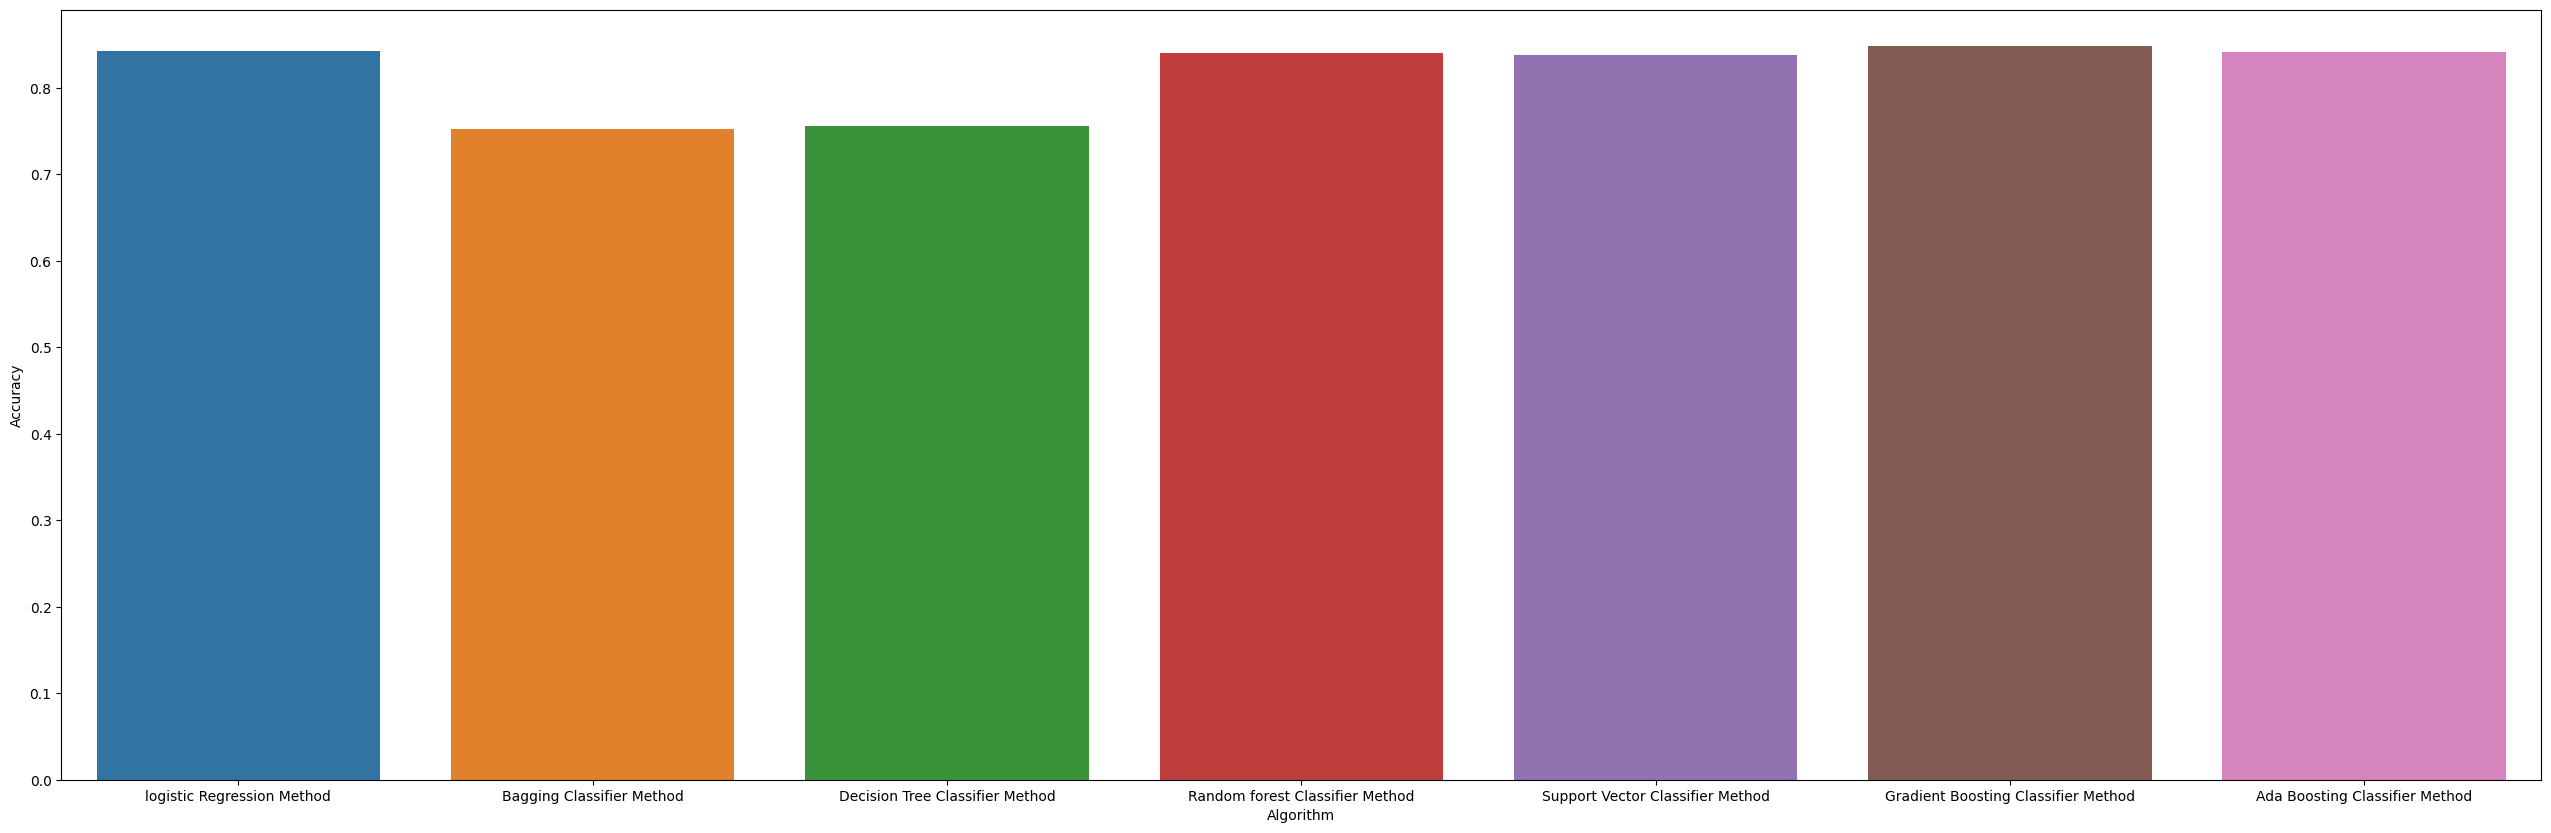

In [61]:
plt.figure(figsize=(32,10))
sns.barplot(x = "Algorithm", y = "Accuracy", data = results)
plt.show()

 **Therefore Gradient Boosting Classifier Method is working well compared to others **
